In [1]:
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold, RandomizedSearchCV,StratifiedKFold,learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *
#import xgboost as xgb
from xgboost import XGBClassifier,XGBRFClassifier
from tune_sklearn import TuneSearchCV,TuneGridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
import matplotlib.pyplot as plt 

from data_prepare_func import convert_to_array

In [2]:
x_kit,y_kit = convert_to_array("data_fr_kittinan/",size=28)
x_diy,y_diy = convert_to_array('data_writing_diy/',size=28)

In [3]:
x = np.append(x_kit,x_diy,axis=0)

y = np.append(y_kit,y_diy,axis=0)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
pipe_xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier()) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

In [9]:
parameters = {
    'max_depth' : [ i for i in range(1,11,1)],
}
tune = GridSearchCV(XGBRFClassifier(),cv=5,param_grid=parameters,n_jobs=-1,scoring='accuracy')

In [10]:
tune.fit(x_train, y_train)
print(tune.best_params_)

{'max_depth': 10}


In [11]:
parameters = {
    'learning_rate': [0.01,0.05,0.1,0.2],
}
tune = GridSearchCV(XGBRFClassifier(),cv=5,param_grid=parameters,n_jobs=-1,scoring='accuracy')

In [12]:
tune.fit(x_train, y_train)
print(tune.best_params_)

{'learning_rate': 0.01}


In [13]:
parameters = {
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
}
tune = GridSearchCV(XGBRFClassifier(),cv=5,param_grid=parameters,n_jobs=-1,scoring='accuracy')

In [14]:
tune.fit(x_train, y_train)
print(tune.best_params_)

{'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [15]:
parameters = {
    'subsample' : [0.5,0.7,0.9],
    'colsample_bytree': [0.5,0.7,0.9],
}
tune = GridSearchCV(XGBRFClassifier(),cv=5,param_grid=parameters,n_jobs=-1,scoring='accuracy')

In [16]:
tune.fit(x_train, y_train)
print(tune.best_params_)

{'colsample_bytree': 0.5, 'subsample': 0.7}


In [17]:
parameters = {
    'subsample' : [0.5,0.7,0.9],
    'colsample_bytree': [0.5,0.7,0.9],
    'tree_method': ['approx','hist','gpu_hist']
}
tune = GridSearchCV(XGBRFClassifier(),cv=5,param_grid=parameters,n_jobs=-1,scoring='accuracy')

In [18]:
tune.fit(x_train, y_train)
print(tune.best_params_)

{'colsample_bytree': 0.5, 'subsample': 0.9, 'tree_method': 'hist'}


In [8]:
pipe_xgb.set_params(classifier__max_depth=4,classifier__learning_rate=0.001,classifier__gamma=0,classifier__reg_alpha=1,classifier__reg_lambda=1,classifier__colsample_bytree=0.5,
        classifier__subsample=0.7,classifier__tree_method='hist',classifier__n_estimators=140,classifier__eval_metric='merror',
        classifier__colsample_bylevel=0.5,classifier__colsample_bynode=0.5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.5, colsample_bynode=0.5,
                               colsample_bytree=0.5, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='merror',
                               feature_types=None, gamma=0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=140, n_j

In [9]:
train_sizes, train_scores, test_scores = learning_curve(pipe_xgb, x_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

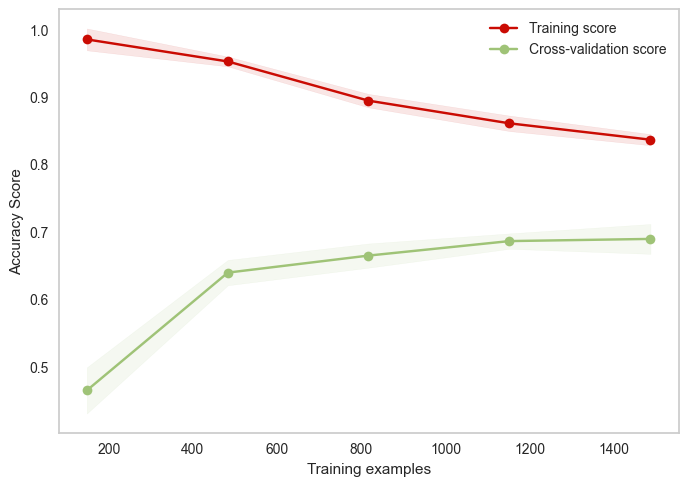

In [10]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")

In [11]:
x = np.append(x_kit,x_diy,axis=0)

y = np.append(y_kit,y_diy,axis=0)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [17]:
pipe_xgb.fit(x_train, y_train,)

print('Training xgb set score: ' + str(pipe_xgb.score(x_train,y_train)))
print('Test xgb set score: ' + str(pipe_xgb.score(x_test,y_test)))

Training xgb set score: 0.8192576654115116
Test xgb set score: 0.7092731829573935


In [18]:
pipe_xgb.fit(x_train, y_train)

train_yhat = pipe_xgb.predict(x_train)
train_pipe = pipe_xgb.score(x_train,y_train)

test_yhat = pipe_xgb.predict(x_test)
test_pipe = pipe_xgb.score(x_test,y_test)
print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG Accuracy Train: {train_pipe}\nAVG Accuracy Test: {test_pipe}")


Train Score
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       185
           1       0.98      0.87      0.92       185
           2       0.94      0.82      0.88       187
           3       0.90      0.93      0.91       188
           4       0.82      0.63      0.71       185
           5       0.69      0.82      0.75       185
           6       0.90      0.82      0.86       185
           7       0.82      0.82      0.82       185
           8       0.79      0.65      0.72       184
           9       0.60      0.89      0.72       190

    accuracy                           0.82      1859
   macro avg       0.84      0.82      0.82      1859
weighted avg       0.84      0.82      0.82      1859

Test Score
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        79
           1       0.90      0.90      0.90        80
           2       0.83      0.60      0.70        80

In [20]:
xgb_val_score = cross_val_score(pipe_xgb,x_train,y_train,scoring='accuracy',cv=5)
print(f"Average xgb cv score: {round(np.mean(xgb_val_score),4)}\nxgb SD: {xgb_val_score.std()}")

Average xgb cv score: 0.6896
xgb SD: 0.021980265008324305
